In [ ]:
# Комар Софія | завдання 1 - підготовка до проекту

**github**
https://github.com/soviio/komar_sofiia_deep_learning/tree/main

In [ ]:
import torch

In [ ]:
# 1) налаштування середовища
print(torch.cuda.is_available())  # True - GPU доступний
print(torch.cuda.get_device_name(0))  # назва GPU

True
Tesla T4


In [ ]:
pip install tensorflow torch matplotlib

In [ ]:
print(tf.config.list_physical_devices('GPU'))  # список доступних GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!python --version

Python 3.11.11


In [ ]:
# 2) пошук та вибір датасету на Kaggle
# https://www.kaggle.com/datasets/puneet6060/intel-image-classification?resource=download

In [ ]:
# завантаження датасету
import os
print("/content/:", os.listdir("/content/")) # archive.zip - нащ датасет з кеглу

/content/: ['.config', 'seg_train', 'seg_pred', 'archive.zip', '.ipynb_checkpoints', 'seg_test']


In [ ]:
!file /content/archive.zip

/content/archive.zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [ ]:
!rm -rf /content/__MACOSX # без цього у мене не всі папки підлягали розархівуванню (приховані метадані)

!jar xvf /content/archive.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 inflated: seg_train/seg_train/mountain/7506.jpg
 inflated: seg_train/seg_train/mountain/7537.jpg
 inflated: seg_train/seg_train/mountain/7539.jpg
 inflated: seg_train/seg_train/mountain/7551.jpg
 inflated: seg_train/seg_train/mountain/7560.jpg
 inflated: seg_train/seg_train/mountain/7565.jpg
 inflated: seg_train/seg_train/mountain/7578.jpg
 inflated: seg_train/seg_train/mountain/7581.jpg
 inflated: seg_train/seg_train/mountain/7586.jpg
 inflated: seg_train/seg_train/mountain/7647.jpg
 inflated: seg_train/seg_train/mountain/7652.jpg
 inflated: seg_train/seg_train/mountain/7654.jpg
 inflated: seg_train/seg_train/mountain/7662.jpg
 inflated: seg_train/seg_train/mountain/767.jpg
 inflated: seg_train/seg_train/mountain/7672.jpg
 inflated: seg_train/seg_train/mountain/7679.jpg
 inflated: seg_train/seg_train/mountain/7681.jpg
 inflated: seg_train/seg_train/mountain/7693.jpg
 inflated: seg_train/seg_train/mountain/7695.jpg
 i

In [ ]:
!jar xvf /content/seg_train/seg_train/sea.zip
# було необхідно для розархівування конкретних класів, поки не вирішилось питпння з прихованими метадани

  created: sea/
 inflated: __MACOSX/._sea
 inflated: sea/6400.jpg
 inflated: __MACOSX/sea/._6400.jpg
 inflated: sea/15259.jpg
 inflated: __MACOSX/sea/._15259.jpg
 inflated: sea/17328.jpg
 inflated: __MACOSX/sea/._17328.jpg
 inflated: sea/7078.jpg
 inflated: __MACOSX/sea/._7078.jpg
 inflated: sea/14635.jpg
 inflated: __MACOSX/sea/._14635.jpg
 inflated: sea/19311.jpg
 inflated: __MACOSX/sea/._19311.jpg
 inflated: sea/16744.jpg
 inflated: __MACOSX/sea/._16744.jpg
 inflated: sea/18999.jpg
 inflated: __MACOSX/sea/._18999.jpg
 inflated: sea/18741.jpg
 inflated: __MACOSX/sea/._18741.jpg
 inflated: sea/9069.jpg
 inflated: __MACOSX/sea/._9069.jpg
 inflated: sea/5653.jpg
 inflated: __MACOSX/sea/._5653.jpg
 inflated: sea/18027.jpg
 inflated: __MACOSX/sea/._18027.jpg
 inflated: sea/11765.jpg
 inflated: __MACOSX/sea/._11765.jpg
 inflated: sea/13166.jpg
 inflated: __MACOSX/sea/._13166.jpg
 inflated: sea/1421.jpg
 inflated: __MACOSX/sea/._1421.jpg
 inflated: sea/13600.jpg
 inflated: __MACOSX/sea/._13

In [ ]:
 # 3) структура датасету

In [ ]:
# визначте кількість класів (навчальна множина / тестова)
base_paths = {
    "train": "/content/seg_train/seg_train",
    "test": "/content/seg_test/seg_test"
}

for dataset_name, dataset_path in base_paths.items():
    if os.path.exists(dataset_path):
        # without ".ipynb_checkpoints"
        classes = [folder for folder in os.listdir(dataset_path)
                   if os.path.isdir(os.path.join(dataset_path, folder)) and folder != ".ipynb_checkpoints"]

        print(f"{dataset_name} -> {len(classes)} classes: ")
        print(f"{classes}\n")
    else:
        print(f"{dataset_name} -")

train -> 6 classes: 
['glacier', 'sea', 'street', 'mountain', 'forest', 'buildings']

test -> 6 classes: 
['glacier', 'sea', 'street', 'mountain', 'forest', 'buildings']



In [ ]:
# виділіть валідаційну множину;

import shutil
import random

train_path = "/content/seg_train/seg_train"
val_path = "/content/seg_val"  # для валідаційної множини
os.makedirs(val_path, exist_ok=True)

val_split = 0.2

for category in os.listdir(train_path):
    category_path = os.path.join(train_path, category)

    if os.path.isdir(category_path):
        val_category_path = os.path.join(val_path, category)
        os.makedirs(val_category_path, exist_ok=True)

        files = os.listdir(category_path)
        num_val = int(len(files) * val_split)  # 20% файлів для валідації

        val_files = random.sample(files, num_val)

        for file in val_files:
            src = os.path.join(category_path, file)
            dst = os.path.join(val_category_path, file)
            shutil.move(src, dst)

        print(f"сlass '{category}': {num_val} -> seg_val")

print("\ndone '/content/seg_val'")

сlass 'glacier': 480 -> seg_val
сlass 'sea': 454 -> seg_val
сlass 'street': 476 -> seg_val
сlass 'mountain': 502 -> seg_val
сlass '.ipynb_checkpoints': 0 -> seg_val
сlass 'forest': 454 -> seg_val
сlass 'buildings': 438 -> seg_val

done '/content/seg_val'


In [ ]:
# структура каталогів (папок);

base_paths = [
    "/content/seg_train/seg_train",
    "/content/seg_val",
    "/content/seg_test/seg_test"
]

for base_path in base_paths:
    print(f"{base_path}:")

    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)

        if os.path.isdir(category_path):
            num_files = len(os.listdir(category_path))
            print(f"category '{category}': {num_files} files")

    print("\n")

/content/seg_train/seg_train:
category 'glacier': 1924 files
category 'sea': 1820 files
category 'street': 1906 files
category 'mountain': 2010 files
category '.ipynb_checkpoints': 0 files
category 'forest': 1817 files
category 'buildings': 1753 files


/content/seg_val:
category 'glacier': 480 files
category 'sea': 454 files
category 'street': 476 files
category 'mountain': 502 files
category '.ipynb_checkpoints': 0 files
category 'forest': 454 files
category 'buildings': 438 files


/content/seg_test/seg_test:
category 'glacier': 553 files
category 'sea': 510 files
category 'street': 501 files
category 'mountain': 525 files
category 'forest': 474 files
category 'buildings': 437 files




In [ ]:
# ознайомтеся з форматом файлів
from PIL import Image

base_paths = [
    "/content/seg_train/seg_train",
    "/content/seg_val",
    "/content/seg_test/seg_test"
]

for base_path in base_paths:
    print(f"\n {base_path}:")
    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        if os.path.isdir(category_path):
            print(f"\n  category: {category}")
            for file in os.listdir(category_path)[:1]:
                file_path = os.path.join(category_path, file)
                if os.path.isfile(file_path):
                    try:
                        img = Image.open(file_path)
                        print(f"    {file}: {img.format}, {img.size}, {img.mode}")
                    except Exception as e:
                        print(f"  problems with opening {file}: {e}")
    print("\n")


 /content/seg_train/seg_train:

  category: glacier
    10488.jpg: JPEG, (150, 150), RGB

  category: sea
    9408.jpg: JPEG, (150, 150), RGB

  category: street
    1411.jpg: JPEG, (150, 150), RGB

  category: mountain
    6697.jpg: JPEG, (150, 150), RGB

  category: .ipynb_checkpoints

  category: forest
    16527.jpg: JPEG, (150, 150), RGB

  category: buildings
    11696.jpg: JPEG, (150, 150), RGB



 /content/seg_val:

  category: glacier
    8216.jpg: JPEG, (150, 150), RGB

  category: sea
    13099.jpg: JPEG, (150, 150), RGB

  category: street
    349.jpg: JPEG, (150, 150), RGB

  category: mountain
    1637.jpg: JPEG, (150, 150), RGB

  category: .ipynb_checkpoints

  category: forest
    12457.jpg: JPEG, (150, 150), RGB

  category: buildings
    19649.jpg: JPEG, (150, 150), RGB



 /content/seg_test/seg_test:

  category: glacier
    20457.jpg: JPEG, (150, 150), RGB

  category: sea
    20678.jpg: JPEG, (150, 150), RGB

  category: street
    24300.jpg: JPEG, (150, 150), RG

done: 11230
failed: 0
First one: <class 'torch.Tensor'>, size: torch.Size([3, 150, 150])


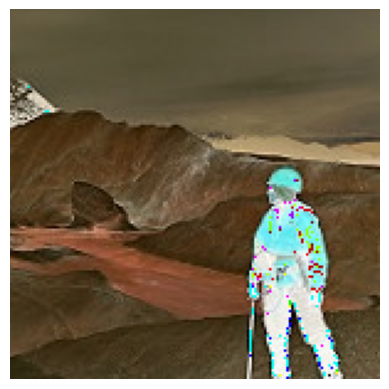

In [ ]:
# виконайте перетворення в тензори + денормалізація

import matplotlib.pyplot as plt
from torchvision import transforms

def convert_to_tensor(train_path):
    transform = transforms.Compose([
        transforms.Resize((150, 150)),
        transforms.ToTensor()  # трансформація перетворює пікселі з діапазону [0, 255] в діапазон [0, 1]
    ])

    tensor_list = []
    success_count = 0
    failure_count = 0

    for category in os.listdir(train_path):
        category_path = os.path.join(train_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                if os.path.isfile(file_path):
                    try:
                        img = Image.open(file_path)
                        img_tensor = transform(img)

                        if img_tensor.size() == torch.Size([3, 150, 150]):
                            tensor_list.append(img_tensor)
                            success_count += 1
                        else:
                            print(f"Problems with size {file}: {img_tensor.size()}")
                            failure_count += 1

                    except Exception as e:
                        print(f"Problems with {file}: {e}")
                        failure_count += 1

    print(f"done: {success_count}")
    print(f"failed: {failure_count}")

    return tensor_list

def denormalize(tensor):
    return tensor * 255.0  # [0, 255]


def visualize_denormalized_image(tensor):
    denormalized_tensor = denormalize(tensor)
    denormalized_img = transforms.ToPILImage()(denormalized_tensor)
    plt.imshow(denormalized_img)
    plt.axis('off')
    plt.show()

tensor_list = convert_to_tensor(train_path)

if len(tensor_list) > 0:
    print(f"First one: {type(tensor_list[0])}, size: {tensor_list[0].size()}")
    visualize_denormalized_image(tensor_list[0])

In [ ]:
# створіть DataLoader для навчального та тестового наборів даних, щоб спростити процес завантаження даних за батчами;
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms

def remove_checkpoints(path):
    checkpoint_path = os.path.join(path, '.ipynb_checkpoints')
    if os.path.isdir(checkpoint_path):
        shutil.rmtree(checkpoint_path)
        print(f"removed: {checkpoint_path}")

train_path = "/content/seg_train/seg_train"
test_path = "/content/seg_test/seg_test"

remove_checkpoints(train_path)
remove_checkpoints(test_path)

transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for images, labels in train_loader:
    print(f"Батч розміру {images.size()}, мітки: {labels}")
    break

# результат: батч складається з 32 зображень, кожне з яких має розмір 150x150 пікселів і 3 канали (RGB).

removed: /content/seg_train/seg_train/.ipynb_checkpoints
Батч розміру torch.Size([32, 3, 150, 150]), мітки: tensor([4, 3, 2, 1, 4, 4, 3, 0, 1, 0, 1, 3, 5, 4, 3, 4, 0, 1, 4, 2, 1, 4, 3, 0,
        0, 1, 1, 3, 3, 3, 0, 0])


In [ ]:
# реалізуйте аугментацію даних для підвищення загальної якості моделі;

# масштабування та аугментація
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # горизонтальне відображення
    transforms.RandomRotation(20),  # повороти на 20 градусів
    transforms.RandomResizedCrop(150, scale=(0.8, 1.0)),  # зріз з повторним масштабуванням
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # яскравість, контраст та насиченість
    transforms.Resize((150, 150)),
    transforms.ToTensor()
])

train_path = "/content/seg_train/seg_train"
test_path = "/content/seg_test/seg_test"

train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor()
]))

for images, labels in train_loader:
    print(f"Батч розміру {images.size()}, мітки: {labels}")
    break


Батч розміру torch.Size([32, 3, 150, 150]), мітки: tensor([1, 0, 3, 4, 2, 4, 3, 2, 4, 1, 0, 0, 5, 2, 3, 0, 1, 2, 2, 4, 2, 4, 2, 4,
        5, 1, 4, 3, 3, 4, 3, 2])


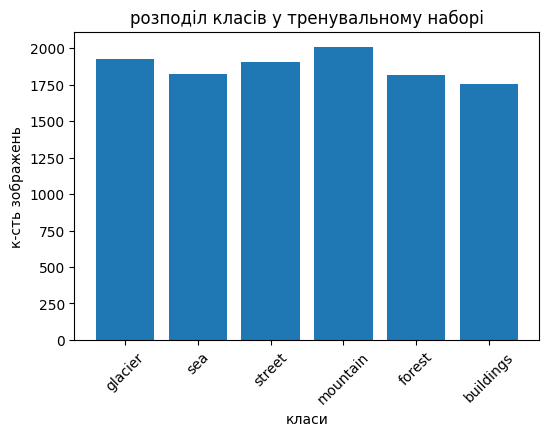

к-сть зображень у кожному класі:
glacier -> 1924
sea -> 1820
street -> 1906
mountain -> 2010
forest -> 1817
buildings -> 1753


In [70]:
# проаналізуйте якість даних, перевірте на наявність зашумлень або незбалансованих класів
from collections import Counter

def count_classes(train_path):
    class_counts = {}
    for category in os.listdir(train_path):
        category_path = os.path.join(train_path, category)
        if os.path.isdir(category_path):
            class_counts[category] = len(os.listdir(category_path))  # лічильник

    return class_counts

train_path = "/content/seg_train/seg_train"
class_counts = count_classes(train_path)
plt.figure(figsize=(6,4))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.title('розподіл класів у тренувальному наборі')
plt.xlabel('класи')
plt.ylabel('к-сть зображень')
plt.show()

print("к-сть зображень у кожному класі:")
for category, count in class_counts.items():
    print(f"{category} -> {count}")

In [59]:
def check_corrupted_images(train_path):
    corrupted_files = []

    for category in os.listdir(train_path):
        category_path = os.path.join(train_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                try:
                    img = Image.open(file_path)
                    img.verify()  # чи є зображення коректним
                except (IOError, SyntaxError) as e:
                    corrupted_files.append(file_path)

    return corrupted_files

corrupted_files = check_corrupted_images(train_path)

if corrupted_files:
    print("пошкоджені зображення:")
    for file in corrupted_files:
        print(file)
else:
    print("пошкоджених зображень нема")

пошкоджених зображень нема


In [58]:
def check_image_sizes(train_path, expected_size=(150, 150)):
    abnormal_images = []

    for category in os.listdir(train_path):
        category_path = os.path.join(train_path, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)
                if os.path.isfile(file_path):
                    try:
                        img = Image.open(file_path)
                        if img.size != expected_size:
                            abnormal_images.append(file_path)  # + якщо розмір зображення аномальний
                    except Exception as e:
                        abnormal_images.append(file_path)  # не можна відкрити зображення

    return abnormal_images

abnormal_images = check_image_sizes(train_path)

if abnormal_images:
    print("аномальні зображення з неправильними розмірами:")
    for img in abnormal_images:
        print(img)
else:
    print("зображення мають правильні розміри")

аномальні зображення з неправильними розмірами:
/content/seg_train/seg_train/glacier/16710.jpg
/content/seg_train/seg_train/glacier/7410.jpg
/content/seg_train/seg_train/glacier/18110.jpg
/content/seg_train/seg_train/glacier/7512.jpg
/content/seg_train/seg_train/glacier/12983.jpg
/content/seg_train/seg_train/glacier/3148.jpg
/content/seg_train/seg_train/glacier/16472.jpg
/content/seg_train/seg_train/glacier/2837.jpg
/content/seg_train/seg_train/glacier/11110.jpg
/content/seg_train/seg_train/glacier/1010.jpg
/content/seg_train/seg_train/glacier/17528.jpg
/content/seg_train/seg_train/glacier/5135.jpg
/content/seg_train/seg_train/glacier/15103.jpg
/content/seg_train/seg_train/glacier/12634.jpg
/content/seg_train/seg_train/sea/341.jpg
/content/seg_train/seg_train/sea/19551.jpg
/content/seg_train/seg_train/sea/357.jpg
/content/seg_train/seg_train/sea/5584.jpg
/content/seg_train/seg_train/street/13747.jpg
/content/seg_train/seg_train/mountain/13656.jpg
/content/seg_train/seg_train/mountain/8

In [66]:
tensor_list = []
for images, labels in train_loader:
    for i in range(len(images)):
        tensor_list.append((images[i], labels[i]))

    if len(tensor_list) >= 10:
        break
print(f"к-сть у tensor_list: {len(tensor_list)}")

к-сть у tensor_list: 32


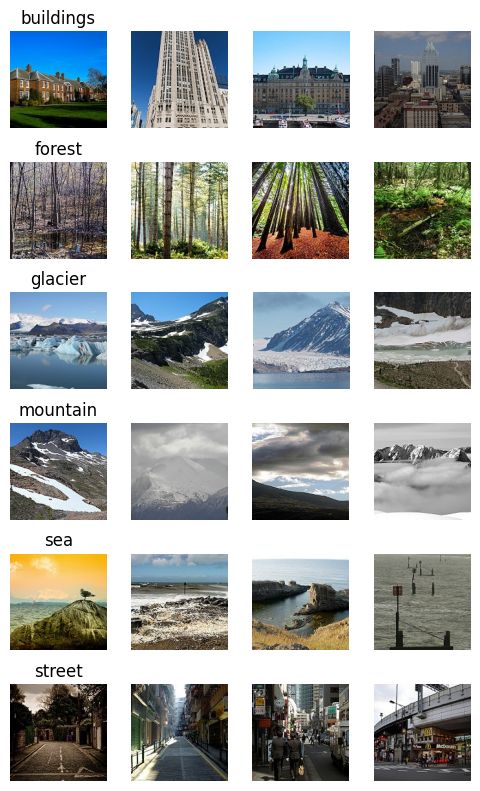

In [83]:
# візуалізуйте по декілька прикладів з різних класів;
def visualize_examples(tensor_list, class_names, examples_per_class=4):
    class_examples = {class_idx: [] for class_idx in range(len(class_names))}

    for tensor, label in tensor_list:
        class_idx = label.item()
        if len(class_examples[class_idx]) < examples_per_class:
            class_examples[class_idx].append(tensor)

    plt.figure(figsize=(5, 8))
    for class_idx, examples in class_examples.items():
        for i, img_tensor in enumerate(examples):
            ax = plt.subplot(len(class_examples), examples_per_class, class_idx * examples_per_class + i + 1)
            img = transforms.ToPILImage()(img_tensor)
            ax.imshow(img)
            ax.axis('off')
            if i == 0:
                ax.set_title(class_names[class_idx])

    plt.tight_layout()
    plt.show()

train_path = "/content/seg_train/seg_train"
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
class_names = train_dataset.classes
visualize_examples(tensor_list, class_names)

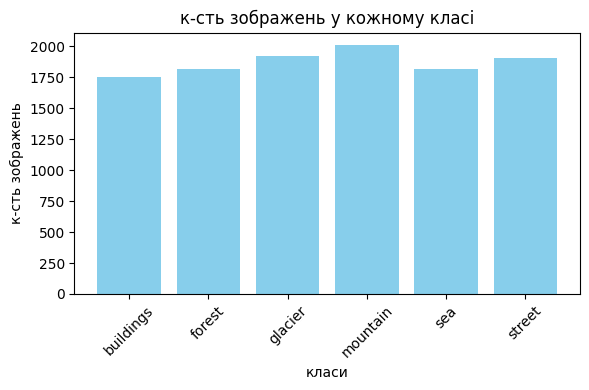

In [89]:
# створіть графік (наприклад, гістограму), який відображає кількість зображень в кожному класі.

train_path = "/content/seg_train/seg_train"
train_dataset = datasets.ImageFolder(root=train_path)
class_names = train_dataset.classes
class_counts = [len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names]
plt.figure(figsize=(6, 4))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('класи')
plt.ylabel('к-сть зображень')
plt.title('к-сть зображень у кожному класі')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# from google.colab import files
# files.download("komar_project01.ipynb")

**Планування на наступний етап**:
- Визначте метрики, за якими будете оцінювати ефективність моделі:
1.   Accuracy
2.   Loss
3.   Precision, Recall, F1-Score

- Заплануйте архітектуру нейронної мережі:

Тут доречні згорткові шари CNN для класифікації зображень.

- Кількість згорткових шарів:

Початкова кількість згорткових шарів буде невеликою (2–3), надалі можуть збільшуватись протягом реалізації проекту при аналізі ситуації.


- Активації:

ReLU для всіх шарів, окрім вихідного шару - тут Softmax.
У задачах класифікації з кількома класами його доречно використовувати.
- Кількість повноз’язних шарів:

Буде один/два повнозв'язних шари після згорткових - у процесі реалізації оберу найоптимальнішу кількість.
- Оптимізатор:

Adam, оскільки він забезпечує високі результати для більшості задач завдяки своїм адаптивним властивостям.


- Dropout:


Значення ~0.4 буде непоганим для початку - важливо запобігти перенавчанню.

In [92]:
!pipreqs /content/ --force

INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in /content/requirements.txt


In [93]:
!pip freeze > requirements.txt